# Imports & Model Setup

In [3]:
import sys, os

root_dir = os.path.join(os.getcwd(), '..')
sys.path.append(root_dir)

import seaborn as sns
import pandas as pd
import numpy as np
from note_seq import midi_to_note_sequence, note_sequence_to_midi_file, note_sequence_to_pretty_midi
from heatmap import heatmap, corrplot
from src.evaluation import mgeval
from src.io import output, input, conversion
from src.generation import MusicVAEGenerator
from src.db import generations as db

C:\Users\Eric\miniconda3\envs\mpro\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


pygame 2.0.1 (SDL 2.0.14, Python 3.7.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
import music21
#music21.configure.run()
#music21.environment.set('musescoreDirectPNGPath', 'C:\\Program Files\\MuseScore 3\\bin\\MuseScore3.exe')
#music21.environment.set('musicxmlPath', 'C:\\Program Files\\MuseScore 3\\bin\\MuseScore3.exe')

In [ ]:
vae = MusicVAEGenerator()

NameError: name 'MusicVAEGenerator' is not defined

# Input Analysis

In [ ]:
midi = input.loadMidiFile('../midi/examples/monophonic/pinkpanther_4b.mid')
seq_input = midi_to_note_sequence(midi)

metrics1 = mgeval.analyze_sequence(seq_input)
metrics1

{'pitch_count': 9,
 'pitch_class_histogram': array([0.0300885 , 0.        , 0.0300885 , 0.06017699, 0.41061947,
        0.        , 0.06017699, 0.11504425, 0.        , 0.0300885 ,
        0.20530973, 0.05840708]),
 'pitch_class_transition_matrix': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]]),
 'avg_pitch_interval': 2.388888888888889,
 'pitch_range

# Generate New Sequence

In [ ]:
seq_gen_base = vae.generate(16, 0.6)
print(seq_gen_base['meta'])

{'gen_dur': 8.832008600234985, 'model': 'MusicVAE', 'checkpoint': 'cat-mel_2bar_big', 'temperature': 0.6}


# Gen_base Analysis

In [ ]:
metrics2 = mgeval.analyze_sequence(seq_gen_base['sequence'])
distances = mgeval.calc_distances(metrics1, metrics2)

seq_gen_base['evaluation'] = {
    'metrics': metrics2,
    'distances_to_input': distances
}

metrics2

{'pitch_count': 3,
 'pitch_class_histogram': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.12908012, 0.        ,
        0.66765579, 0.20326409]),
 'pitch_class_transition_matrix': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]]),
 'avg_pitch_interval': 1.3333333333333333,
 'pitch_rang

## Example Plot: Note Length Transition Matrix

Note Length Transitions - Input


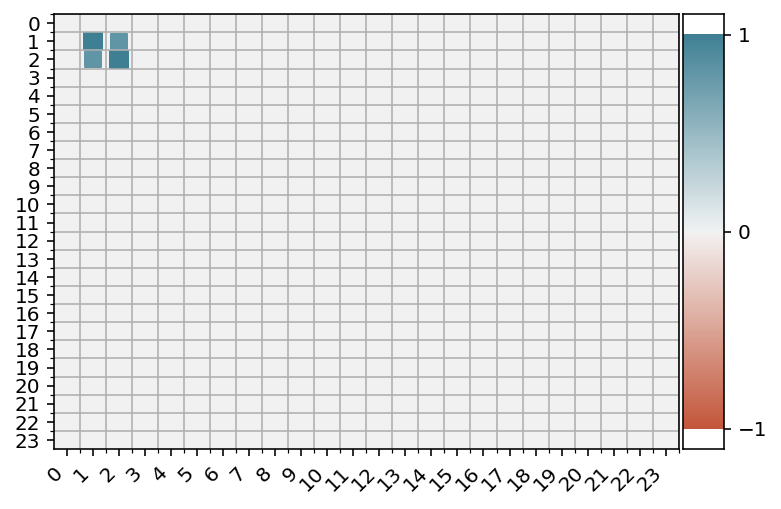

In [ ]:
df1 = pd.DataFrame(metrics1['note_length_transition_matrix'])
corrplot(df1.corr(), size_scale=75)
print("Note Length Transitions - Input")

Note Length Transitions - Generation


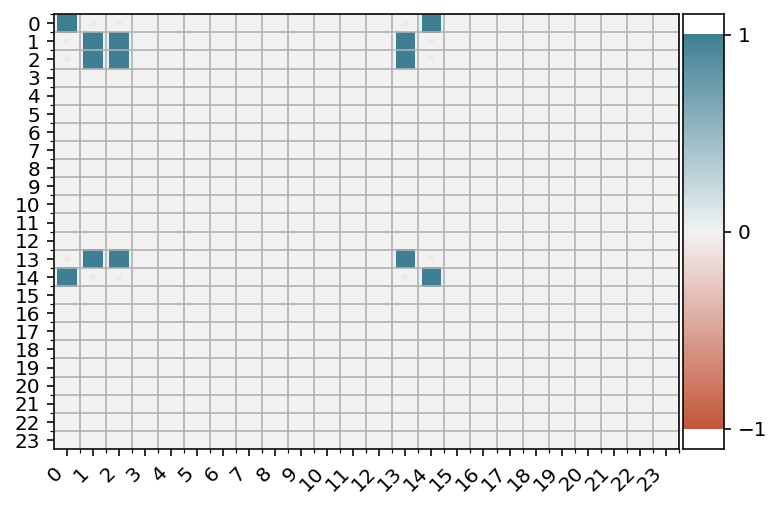

In [ ]:
df2 = pd.DataFrame(metrics2['note_length_transition_matrix'])
corrplot(df2.corr(), size_scale=75)
print("Note Length Transitions - Generation")

## Piano Roll

In [ ]:
output.pianoRollFromNoteSeq(seq_input)
output.pianoRollFromNoteSeq(seq_gen_base['sequence'])

Loading BokehJS ...

Loading BokehJS ...

## Similarity between input and gen_base

In [ ]:
distances

{'pitch_count': 3.0,
 'pitch_class_histogram': 0.8322940082680179,
 'pitch_class_transition_matrix': 3.7416573867739413,
 'avg_pitch_interval': 0.05128205128205132,
 'pitch_range': 6.0,
 'note_count': 10.0,
 'note_length_histogram': 0.8074202360863414,
 'note_length_transition_matrix': 7.745966692414834,
 'avg_ioi': 0.29487179487179493,
 'ioi_histogram': 0.0,
 'ioi_transition_matrix': 10.0}

# Conversion to music21 stream

In [ ]:
input_stream = conversion.note_seq_to_music21(seq_input)
input_stream.show('midi')

In [ ]:
output_stream = conversion.note_seq_to_music21(seq_gen_base['sequence'])
output_stream.show('midi')

# Adaptation

In [ ]:
allowedPitch = set()
for note in input_stream.parts[0].notes:
    allowedPitch.add(note.pitch.pitchClass)
print(allowedPitch)

def findClosest(lst, given_value):
    absolute_difference = lambda list_value : min(abs(list_value - given_value), abs(list_value+12 - given_value), abs(list_value-12 - given_value))
    return min(lst, key=absolute_difference)

{0, 2, 4, 5, 7, 9}


In [ ]:
print(input_stream.analyze('key'))
print(output_stream.analyze('key'))

C major
F# major


In [ ]:
for note in output_stream.parts[0].notes:
    old_pitch = note.pitch.pitchClass
    new_pitch = findClosest(allowedPitch, note.pitch.pitchClass)
    note.pitch.pitchClass += (new_pitch - old_pitch)
    note.pitch.octave += 2
    print(str(old_pitch) + ' => ' + str(new_pitch))

8 => 7
11 => 0
11 => 0
10 => 9


In [ ]:
output_stream.show('midi')

In [ ]:
mf = music21.midi.translate.streamToMidiFile(output_stream)
mf.open('../midi/tmp/adaption_cache.mid', 'wb')
mf.write()
mf.close()

In [ ]:
midi_adapted = input.loadMidiFile('../midi/tmp/adaption_cache.mid')
seq_adapted = midi_to_note_sequence(midi_adapted)

In [ ]:
metrics3 = mgeval.analyze_sequence(seq_adapted)
distances2 = mgeval.calc_distances(metrics1, metrics3)
seq_output = {}
seq_output['sequence'] = seq_adapted
seq_output['evaluation'] = {
    'metrics': metrics2,
    'distances_to_input': distances2
}

In [ ]:
distances2

{'pitch_count': 3.0,
 'pitch_class_histogram': 0.59352316987712,
 'pitch_class_transition_matrix': 3.7416573867739413,
 'avg_pitch_interval': 3.9487179487179485,
 'pitch_range': 0.0,
 'note_count': 10.0,
 'note_length_histogram': 0.8074202360863414,
 'note_length_transition_matrix': 7.745966692414834,
 'avg_ioi': 0.29487179487179493,
 'ioi_histogram': 0.0,
 'ioi_transition_matrix': 10.0}

In [ ]:
id = db.store_generation_result(
    note_sequence_to_pretty_midi(seq_input),
    note_sequence_to_pretty_midi(seq_gen_base['sequence']),
    note_sequence_to_pretty_midi(seq_adapted),
    gen_dur = seq_gen_base['meta']['gen_dur'],
    gen_model = seq_gen_base['meta']['model'] + '_' + seq_gen_base['meta']['checkpoint'],
    gen_temperature = seq_gen_base['meta']['temperature'],
    adapt_dur = 0)
print(id)

TypeError: store_generation_result() got an unexpected keyword argument 'gen_dur'